Importing all the modules

In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day)

Collecting the Data set

In [3]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM532454', 'quandl', start=start, end=end )['Close'])    #Bharti_Airtel

In [4]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM532822', 'quandl', start=start, end=end )['Close'])    #Idea_Cellular

In [5]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM500483', 'quandl', start=start, end=end )['Close'])    #Tata_Comm

In [6]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM532712', 'quandl', start=start, end=end )['Close'])    #Reliance_Comm

In [7]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM500108', 'quandl', start=start, end=end )['Close'])    #MTNL

Renaming the close columns

In [8]:
Bharti_Airtel = com_df1.rename(columns={'Close':'Bharti_Airtel'})
Idea_Cellular = com_df2.rename(columns={'Close':'Idea_Cellular'})
Tata_Comm = com_df3.rename(columns={'Close':'Tata_Comm'})
Reliance_Comm = com_df4.rename(columns={'Close':'Reliance_Comm'})
MTNL = com_df5.rename(columns={'Close':'MTNL'})

Joinig all the data frames

In [9]:
close_df = (((Bharti_Airtel.join(Idea_Cellular, how="outer")).join(Tata_Comm, how="outer")).join(Reliance_Comm, how="outer")).join(MTNL,how="outer")

In [10]:
close_df

,Bharti_Airtel,Idea_Cellular,Tata_Comm,Reliance_Comm,MTNL
Date,,,,,
2018-08-14,366.50,52.10,566.10,20.69,15.45
2018-08-13,368.95,52.60,558.90,20.53,15.55
2018-08-10,369.10,54.35,568.05,19.49,15.70
2018-08-09,366.75,56.30,589.35,20.07,15.95
2018-08-08,384.60,55.30,581.75,18.36,15.70
2018-08-07,381.35,54.95,582.40,16.59,15.80
2018-08-06,386.20,54.90,581.85,16.42,16.05
2018-08-03,374.70,55.15,587.10,15.69,16.25
2018-08-02,372.95,54.40,586.30,14.84,15.75


In [11]:
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,Bharti_Airtel,Idea_Cellular,Tata_Comm,Reliance_Comm,MTNL
Date,,,,,
2018-08-14,NaN,NaN,NaN,NaN,NaN
2018-08-13,0.006685,0.009597,-0.012719,-0.007733,0.006472
2018-08-10,0.000407,0.033270,0.016371,-0.050658,0.009646
2018-08-09,-0.006367,0.035879,0.037497,0.029759,0.015924
2018-08-08,0.048671,-0.017762,-0.012896,-0.085202,-0.015674


# Pair Plotting

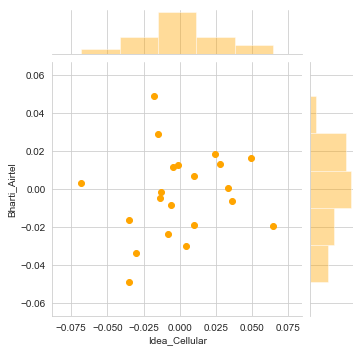

In [13]:
sns.jointplot('Idea_Cellular','Bharti_Airtel',rets, kind='scatter',height=5, color='orange')

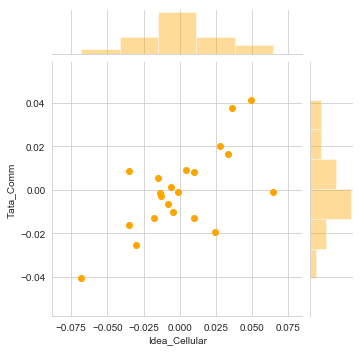

In [14]:
sns.jointplot('Idea_Cellular','Tata_Comm',rets, kind='scatter',height=5, color='orange')

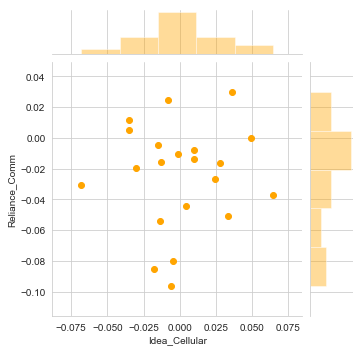

In [15]:
sns.jointplot('Idea_Cellular','Reliance_Comm',rets, kind='scatter',height=5, color='orange')

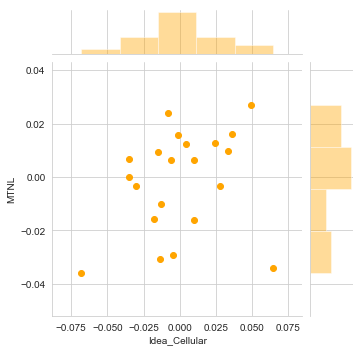

In [16]:
sns.jointplot('Idea_Cellular','MTNL',rets, kind='scatter',height=5, color='orange')

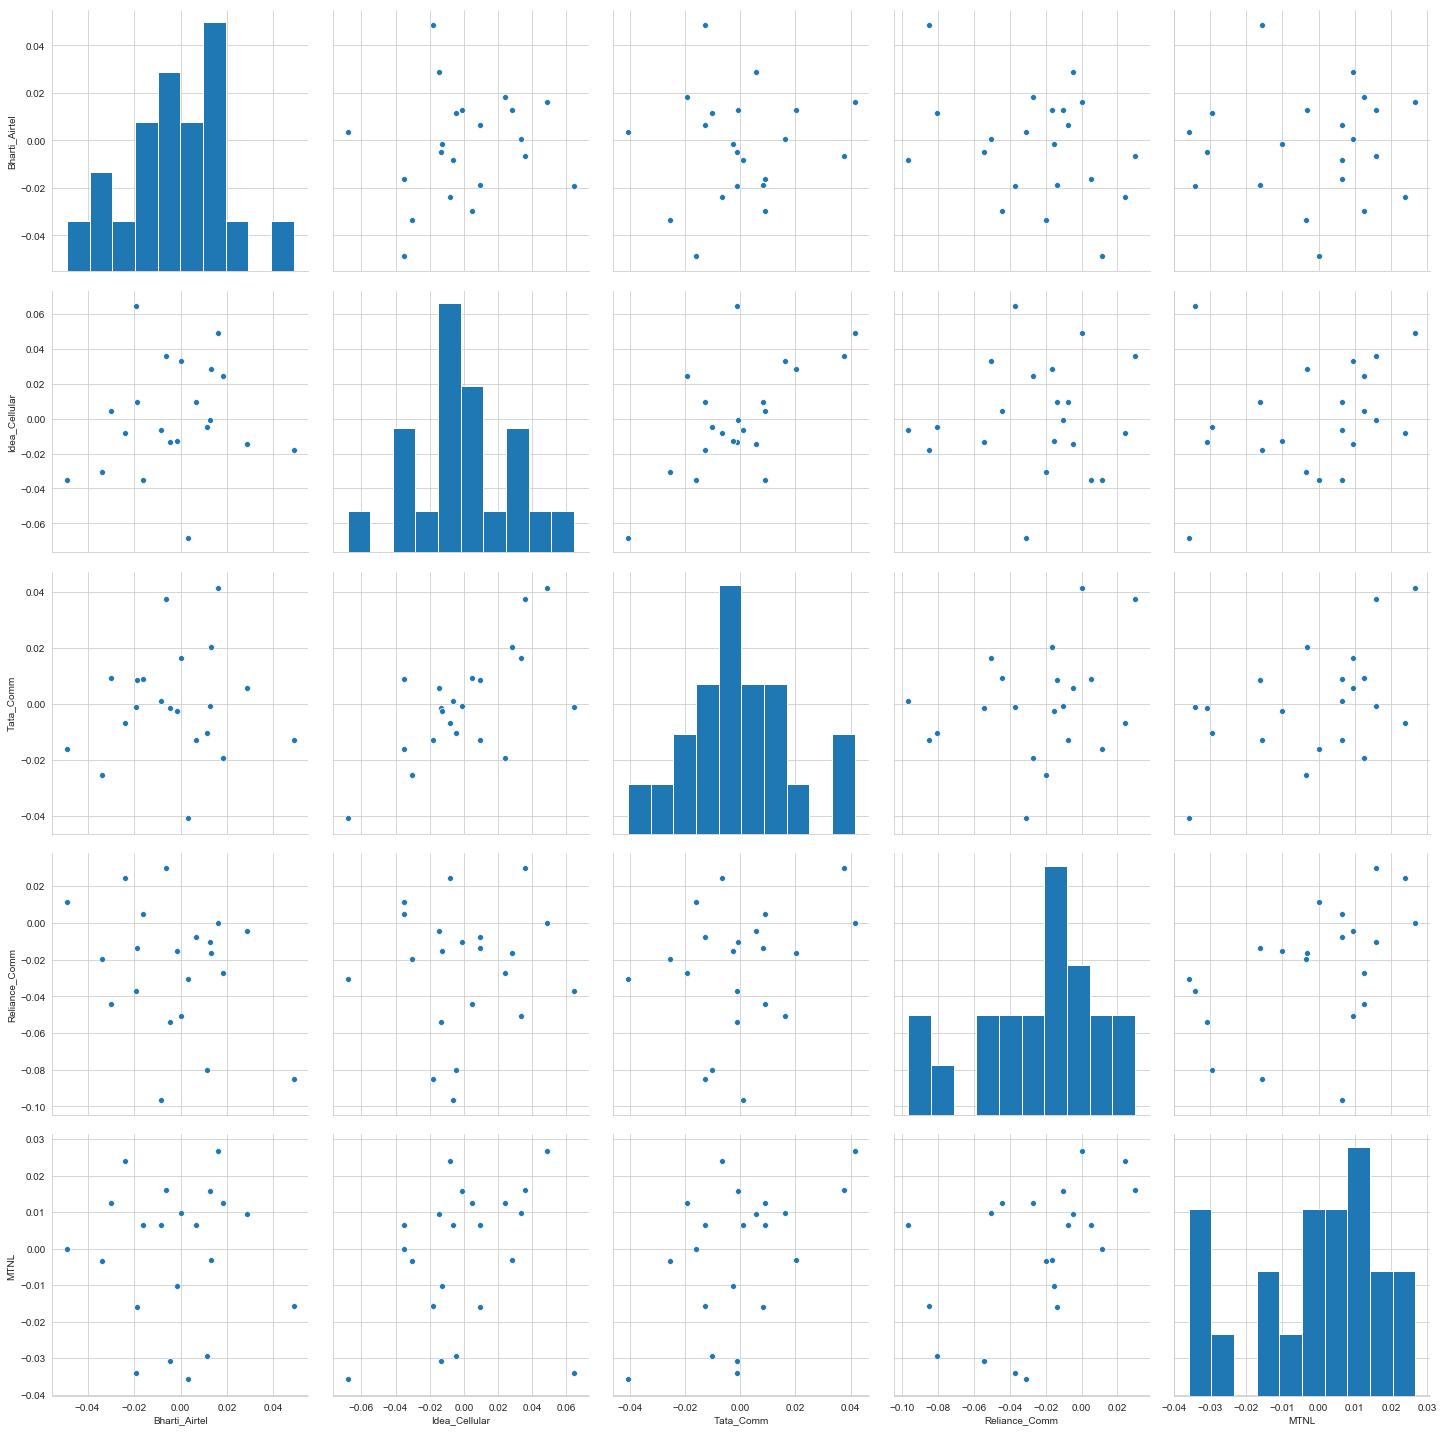

In [17]:
sns.pairplot(rets.dropna(),height=4)

# Correlation Matrix

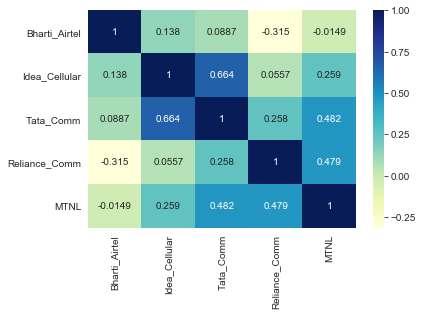

In [18]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

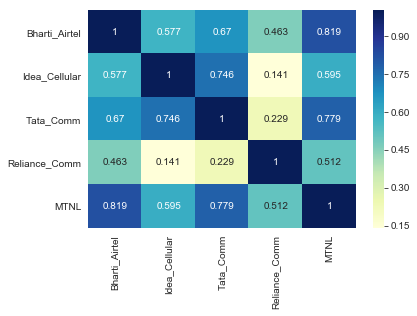

In [19]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

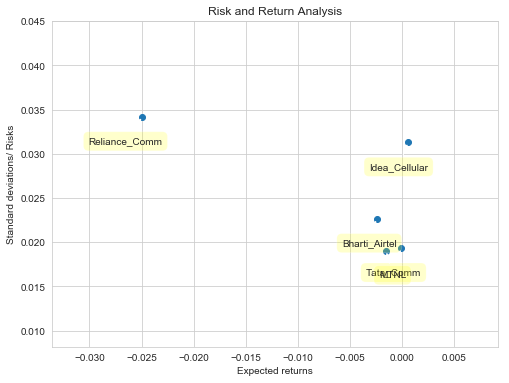

In [20]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [21]:
import numpy as np
import statsmodels.api as sm
X=close_df[['Bharti_Airtel','Tata_Comm','Reliance_Comm','MTNL']]
X = sm.add_constant(X)
y=close_df['Idea_Cellular']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Idea_Cellular   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     5.757
Date:                Wed, 15 Aug 2018   Prob (F-statistic):            0.00406
Time:                        12:52:05   Log-Likelihood:                -38.787
No. Observations:                  22   AIC:                             87.57
Df Residuals:                      17   BIC:                             93.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -14.8022     15.608     -0.948      0.356     -47.731      18.127
Bharti_Airtel     0.0298      0.038      0.776      0.449      -0.051       0.111
Tata_Comm         0.1108      0.045      2.491      0.023       0.017       0.205
Reliance_Comm    -0.0656      0.158     -0.415      0.683      -0.399       0.267
MTNL             -0.2857      1.712     -0.167      0.869      -3.897       3.326
==============================================================================
Omnibus:                        4.179   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                2.456
Skew:                           0.781   Prob(JB):                        0.293
Kurtosis:                       3.492   Cond. No.                     3.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

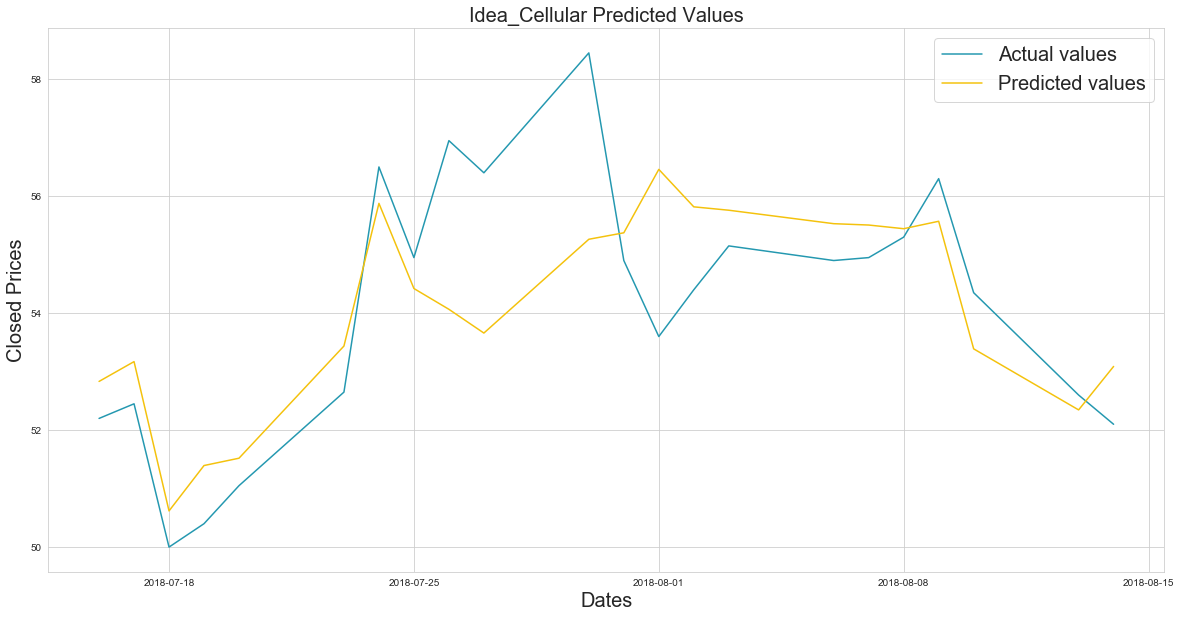

In [22]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('Idea_Cellular Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})